# **# Assignment 7: Comparison Between Libraries**: **Using Dask**

**Group Name:** RAM

**Group Members:**

Ayaz Rahman Bhuiyan (MCS231023)

Mohammed Raza Asfak Chidimar (MCS231004)

Musab Ibne Ahmad (MCS231017)

Hussein Yusuf Sheikh Mohamed (MCS231024)

**Dataset Link: [Water Quality Prediction](https://www.kaggle.com/datasets/mitanshuchakrawarty/water-quality-prediction)**

### **About Dataset:**

This dataset includes pH, iron, nitrate, chloride, lead, zinc, color, turbidity, fluoride, copper, odor, sulfate, conductivity, manganese, and total dissolved solids. Water source, temperature, air temperature, month, day, and time are also recorded. This dataset helps environmental monitoring and health assessments by providing a holistic view of water quality.

## Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d mitanshuchakrawarty/water-quality-prediction
! unzip water-quality-prediction

 98% 929M/944M [00:08<00:00, 122MB/s]
100% 944M/944M [00:08<00:00, 111MB/s]
Archive:  water-quality-prediction.zip
  inflating: dataset.csv             


In [3]:
# Install Dask and other necessary libraries
!pip install dask
!pip install numpy pandas

# Import Dask and other libraries
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd

In [4]:
df = dd.read_csv('dataset.csv')

In [12]:
%%time
df.compute()

CPU times: user 24.7 s, sys: 2.27 s, total: 27 s
Wall time: 18.5 s


,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180767,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
180768,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
180769,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0,1
180770,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0,1


## Statistical Measures

In [7]:
dask_size = df.size.compute()

print(f"The size of the Dask DataFrame is: {dask_size}")

The size of the Dask DataFrame is: 142964208


In [21]:
import dask.dataframe as dd
from dask import compute

dask_shape = df.shape

actual_shape = compute(*dask_shape)

print(f"The shape of the Dask DataFrame is: {actual_shape}")

The shape of the Dask DataFrame is: (5956842, 24)


In [26]:
import dask.dataframe as dd

df_info = df.dtypes

print("Data types:")
print(df_info)


Data types:
Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object


In [8]:
import dask
import dask.dataframe as dd
import dask.array as da
import pandas as pd

class DaskDfOverview:

    def __init__(self, df: dd.DataFrame) -> None:
        self.df = df

    def missing_value(self, column):
        return dask.delayed(pd.isnull)(column).sum().compute()

    def percentage(self, values):
        return [f"{(value / len(self.df) * 100):.2f}%" for value in values]

    def get_overview(self):
        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype'
        ]

        data = []

        for column in self.df.columns:
            data.append((
                column,
                self.df[column].count().compute(),
                self.missing_value(self.df[column]),
                None,
                self.df[column].nunique().compute(),
                None,
                self.df[column].dtype
            ))

        # Compute missing value and unique value percentages
        for i, column in enumerate(self.df.columns):
            data[i] = data[i][:3] + (
                self.percentage([data[i][2]]),
                self.percentage([data[i][4]]),
            ) + data[i][5:]

        return dd.from_pandas(pd.DataFrame(data=data, columns=columns), npartitions=1)

In [31]:
df_overview = DaskDfOverview(df)
overview_result = df_overview.get_overview()

overview_result.compute()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,Index,5956842,0,[0.00%],[100.00%],None,int64
1,pH,5840788,116054,[1.95%],[94.09%],None,float64
2,Iron,5917089,39753,[0.67%],[95.27%],None,float64
3,Nitrate,5851117,105725,[1.77%],[94.25%],None,float64
4,Chloride,5781311,175531,[2.95%],[93.17%],None,float64
5,Lead,5929933,26909,[0.45%],[93.04%],None,float64
6,Zinc,5800716,156126,[2.62%],[93.47%],None,float64
7,Color,5951103,5739,[0.10%],[0.00%],None,object
8,Turbidity,5907027,49815,[0.84%],[95.11%],None,float64
9,Fluoride,5767686,189156,[3.18%],[92.96%],None,float64


In [9]:
import dask.dataframe as dd

def missing_values_table_dask(df):
    # Calculate missing values
    mis_val = df.isnull().sum()

    # Calculate percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_dtype = df.dtypes

    mis_val_table = dd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})
    mis_val_table = mis_val_table[mis_val_table.iloc[:, 0] != 0].compute().sort_values('% of Total Values', ascending=False).round(2)

    print(f"Your selected dataframe has {df.shape[1]} columns.")
    print(f"There are {mis_val_table.shape[0]} columns that have missing values.")

    return mis_val_table if mis_val_table.shape[0] > 0 else None

In [33]:
df_dask = dd.from_pandas(df.compute(), npartitions=1)
missing_values_table_dask(df_dask)

Your selected dataframe has 24 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Copper,199402,3.35,float64
Sulfate,197418,3.31,float64
Fluoride,189156,3.18,float64
Odor,178891,3.00,float64
Chloride,175531,2.95,float64
Water Temperature,168233,2.82,float64
Conductivity,163861,2.75,float64
Zinc,156126,2.62,float64
pH,116054,1.95,float64
Time of Day,114519,1.92,float64


In [23]:
def percent_missing_values_dask(df):
    # Calculate total number of cells in the dataframe
    total_cells = df.size.compute()

    # Calculate the total number of missing values
    missing_count = df.isnull().sum()
    total_missing = missing_count.sum().compute()

    # Calculate the percentage of missing values
    percent_missing = (total_missing / total_cells * 100)

    print("The dataset contains", round(percent_missing, 2), "%", "missing values.")

df_dask = dd.from_pandas(df.compute(), npartitions=1)
percent_missing_values_dask(df_dask)

The dataset contains 1.66 % missing values.


## Visualization

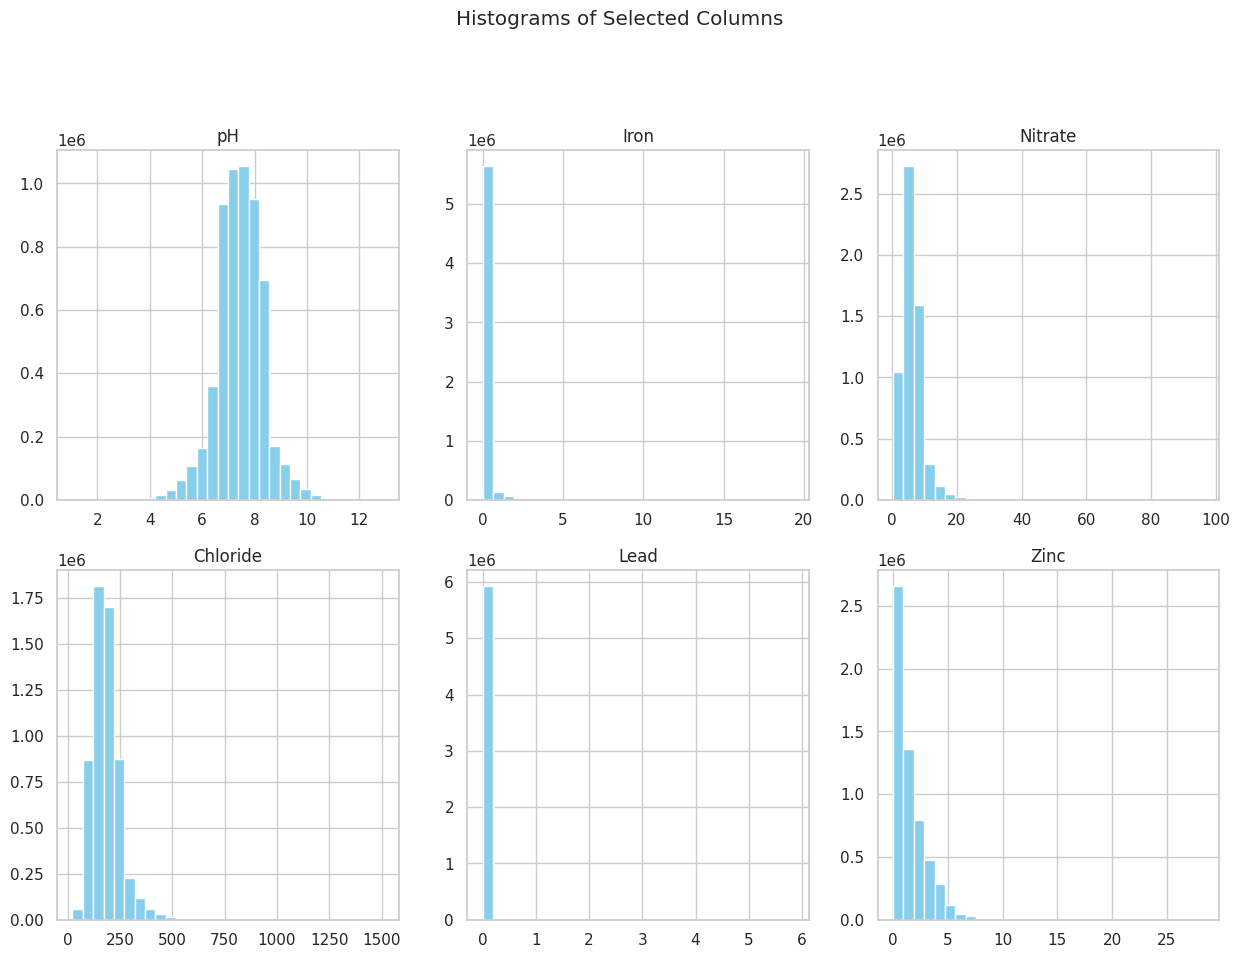

In [26]:
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc']

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
histograms = [da.histogram(df[col], bins=30, range=(df[col].min().compute(), df[col].max().compute()))
              for col in selected_columns]

for i, (col, hist) in enumerate(zip(selected_columns, histograms)):
    axes[i // 3, i % 3].hist(hist[1][:-1], bins=hist[1], weights=hist[0].compute(), color='skyblue')
    axes[i // 3, i % 3].set_title(col)

plt.suptitle('Histograms of Selected Columns', y=1.02)

plt.show()

<ipython-input-27-d477b8de868a>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True, ax=ax)
<ipython-input-27-d477b8de868a>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True, ax=ax)
<ipython-input-27-d477b8de868a>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True, ax=ax)
<ipython-input-27-d477b8de868a>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=T

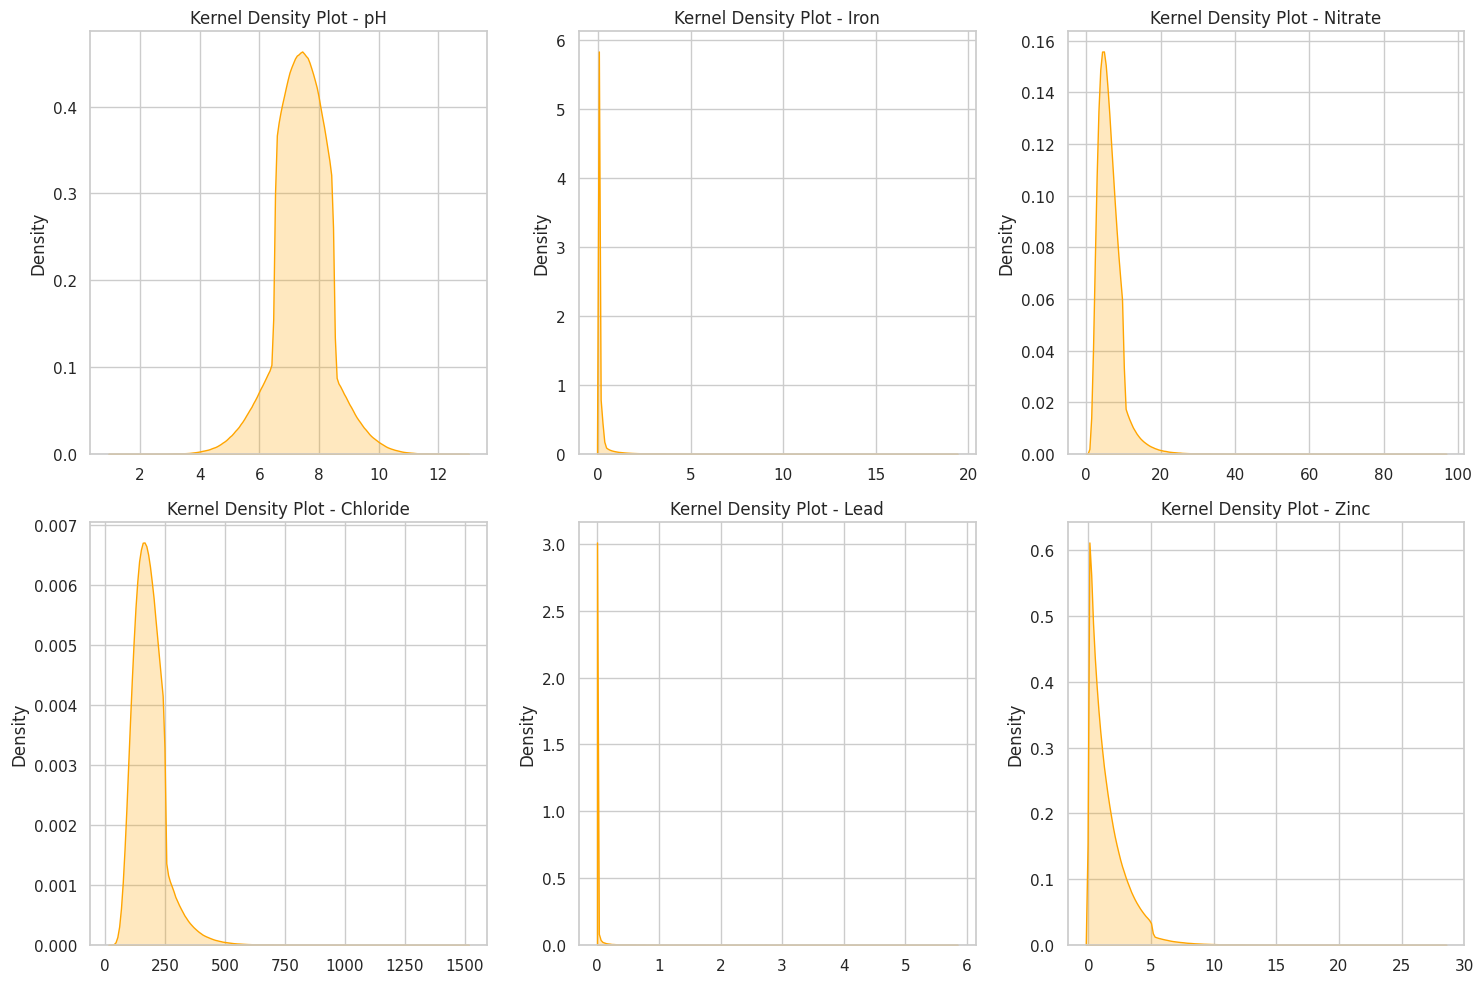

In [27]:
selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc']
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (column, ax) in enumerate(zip(selected_columns, axes.flatten()), 1):
    sns.kdeplot(df[column], color='orange', shade=True, ax=ax)
    ax.set_title(f'Kernel Density Plot - {column}')

plt.tight_layout()
plt.show()

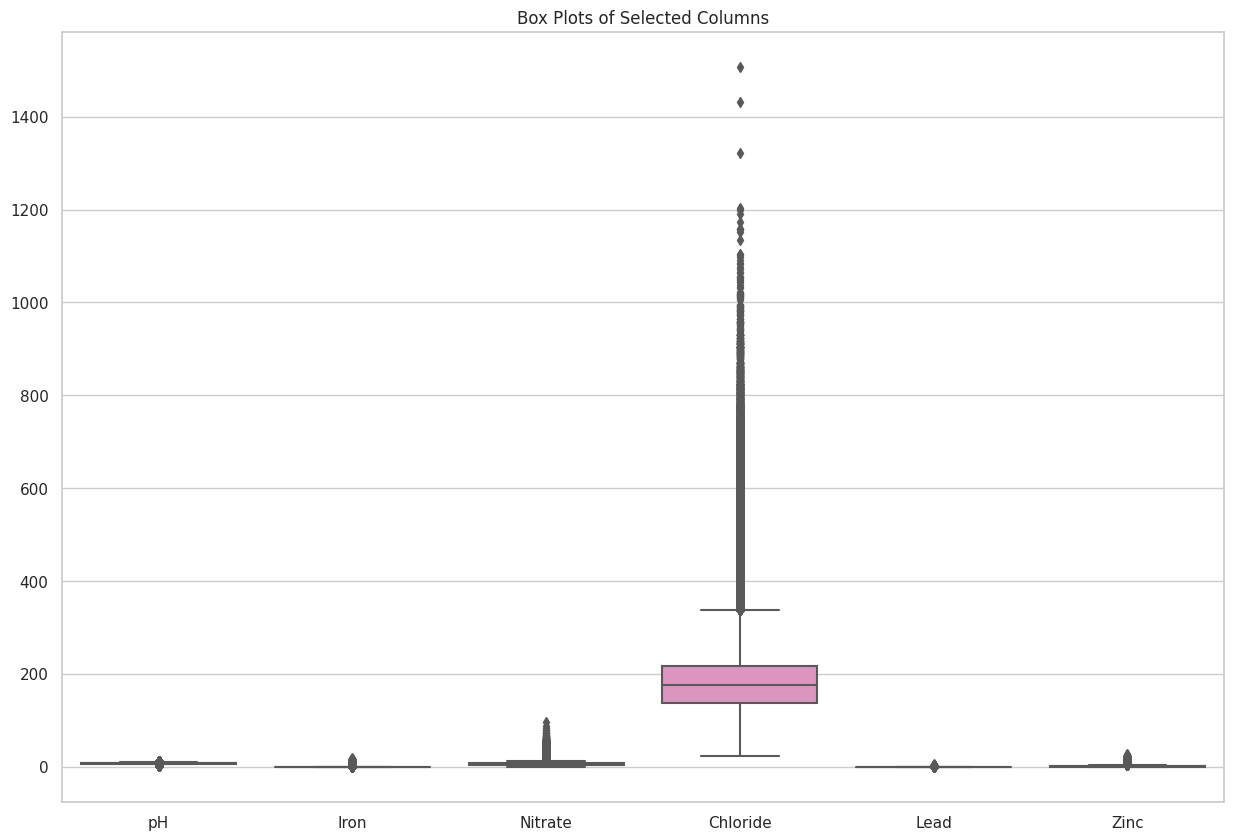

In [28]:
selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc']

# Set the style for Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[selected_columns].compute(), palette='Set2')
plt.title('Box Plots of Selected Columns')
plt.show()

In [29]:
import plotly.express as px

selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Fluoride', 'Copper', 'Sulfate', 'Chlorine', 'Manganese']

selected_df = df[selected_columns]

column_sums = selected_df.sum().compute()

fig = px.pie(names=column_sums.index, values=column_sums.values, title='Distribution of Water Elements', width=800)
fig.show()

# **Pros & Cons of Dask**

### **Advantages**



**1. Ease of use:** Dask integrates seamlessly with familiar libraries like Pandas and NumPy, making it easy for Python users to get started. The API is similar, so you can simply replace libraries like Pandas with their Dask counterparts (Dask DataFrames, Dask Arrays) and experience parallel processing with minimal code changes.


**2. Scalability:** Dask scales gracefully from single-machine use to large clusters with thousands of cores. It efficiently utilizes available resources, whether on your laptop or a distributed computing environment.


**3. Flexibility:** Dask offers various collections like DataFrames, Arrays, Bags, and Datasets, giving you the flexibility to choose the best fit for your data and workload. It also supports a wide range of operations, including filtering, aggregating, and machine learning algorithms.

### **Drawbacks**



**1. Overhead:** Dask introduces some overhead compared to single-threaded execution, especially for small datasets. The benefits of parallelization might not outweigh the overhead for certain tasks.


**2. Limited functionality:** Dask lacks some features available in dedicated big data processing frameworks like Spark. For instance, its SQL engine is still under development, and its integration with other ecosystems like Hadoop is not as extensive.


**3. Limited stateful operations:** Dask collections are mostly immutable, meaning you can't modify existing data in-place. This can be inconvenient for certain workflow patterns.

## **Conclusion**


Dask, a parallel computing library in Python, offers a flexible and scalable solution for handling large-scale datasets and computationally intensive tasks. Its seamless integration with popular Python data science libraries, such as NumPy and Pandas, makes it accessible to users familiar with these tools. Dask's lazy evaluation optimizes resource usage by deferring computation until necessary, providing efficiency in handling complex workflows. Despite its strengths, Dask introduces a learning curve, and not all functionalities of Pandas or NumPy may be fully supported. Deployment complexities, debugging challenges, and memory overhead are considerations that users should be mindful of, especially when working with large datasets.